# STOMP
This notebook demonstrates how to use our STOMP algorithm. It consists of three different methods:

1. Multiprocessing using all cpu cores (default).
2. Multiprocessing using Ray.
3. Single threaded mode.

In [1]:
import numpy as np
import ray
from matrixprofile import stomp, plot

In [2]:
ts = np.loadtxt('rawdata.csv', skiprows=1)
w = 32

# Multiprocessing Default

Compute the profile using the default settings all - CPU cores. Note that it warns us about how much of our compute resources it is utilizing.

In [3]:
profile = stomp(ts, w)

Multiprocessing with 4 cpus.


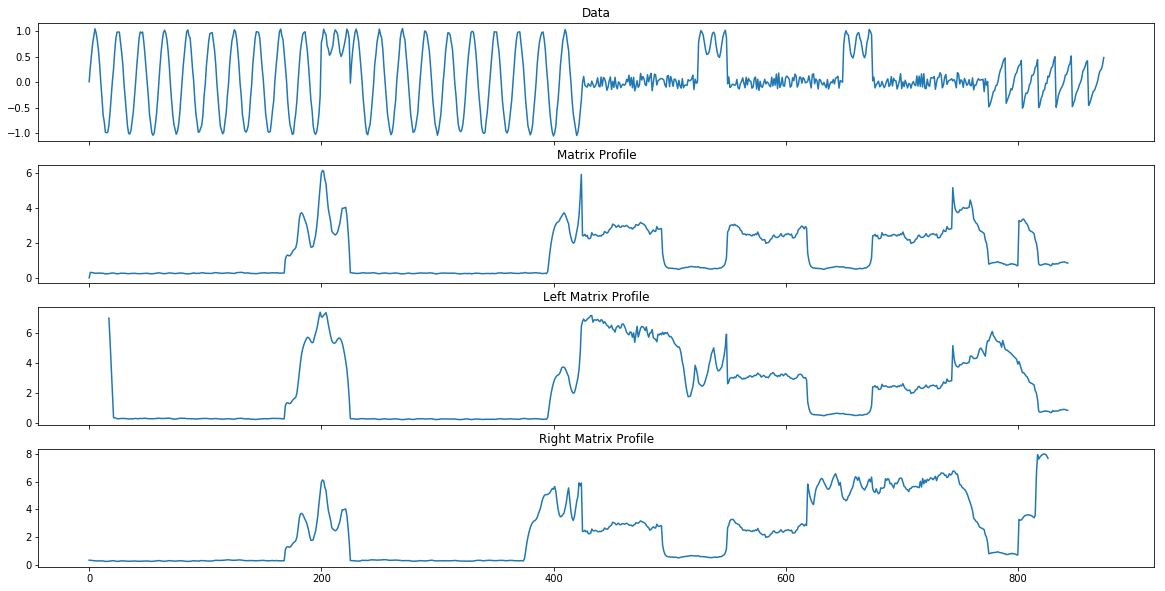

In [4]:
plot.plot(profile, ts)

# Single Threaded

Here we simply change the n_jobs to 1 to perform a serial computation.

In [5]:
profile = stomp(ts, w, n_jobs=1)

Running stomp in single threaded mode.


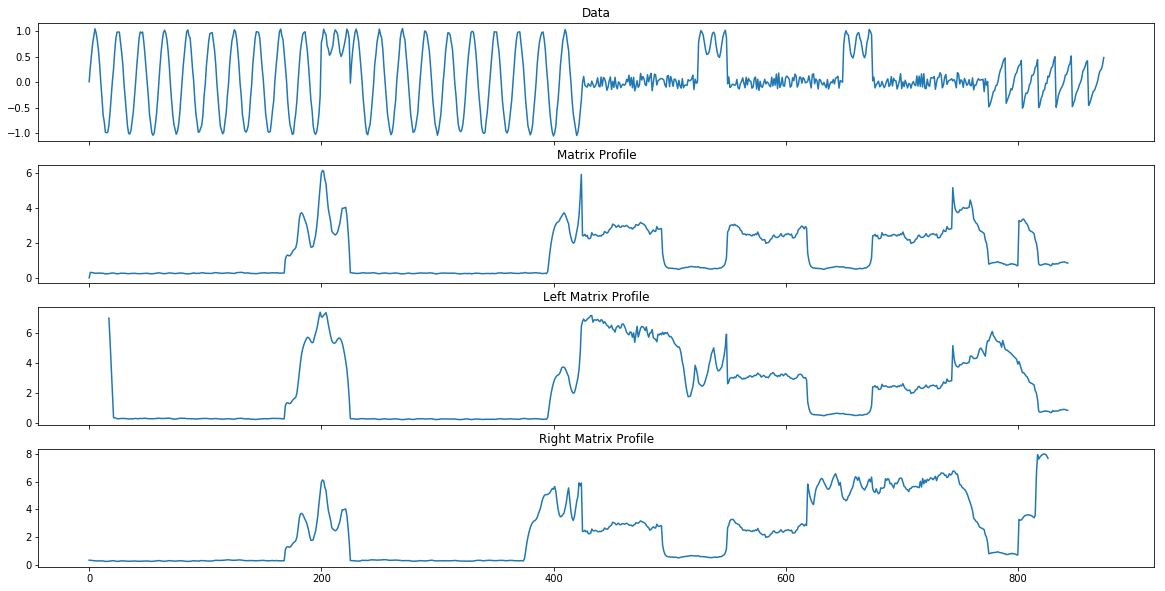

In [6]:
plot.plot(profile, ts)

# Multiprocessing with Ray

Our library is "Ray aware". Meaning that when you have initialized Ray it uses that instead of Python's multiprocessing. This is powerful in that you can configure Ray to work in a distributed environment and our library takes advantage of it. In the following example, we simply use our local computer. I encourage you to spend some time reviewing [Ray's documentation](https://ray.readthedocs.io/en/latest/).

In [7]:
# by default Ray uses all cpu resources
ray.init()
profile = stomp(ts, w)
ray.shutdown()

2019-08-12 10:54:56,575	WARNING worker.py:1337 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2019-08-12 10:54:56,576	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-08-12_10-54-56_576149_14117/logs.
2019-08-12 10:54:56,685	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:43345 to respond...
2019-08-12 10:54:56,814	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:32854 to respond...
2019-08-12 10:54:56,821	INFO services.py:806 -- Starting Redis shard with 1.64 GB max memory.
2019-08-12 10:54:56,858	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-08-12_10-54-56_576149_14117/logs.
2019-08-12 10:54:56,862	INFO services.py:1446 -- Starting the Plasma object store with 2.47 GB memory using /dev/shm.
Using Ray with 4 cpus


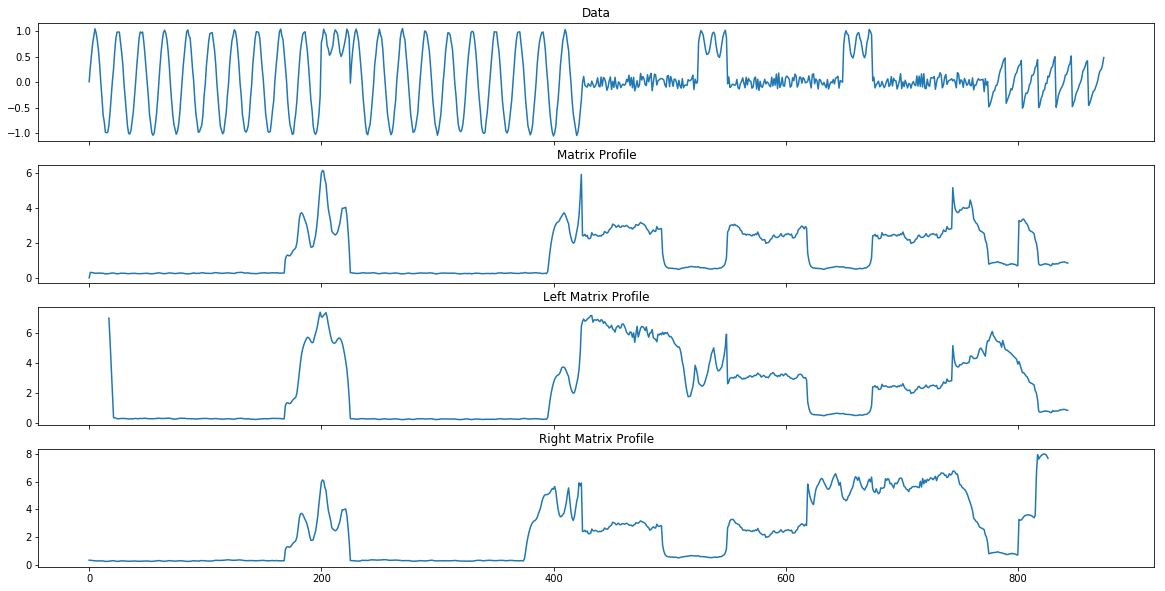

In [8]:
plot.plot(profile, data=ts)